## やること

- 今までの作業をpickleに保存する
- テストデータの異常・正常を判断して、評価する

===========================================

- 正常データセットについて、考える
    - どれを異常とみなすのか
    - 異常の原因は（外れ小島のものを異常とみなそう）
- 正常データセットの獲得方法はどうするか
    - TSNEでやった方がいいかも
- モデルはどうするか
    - 次元削除
    - クラスタリング
    - 近傍法を用いたもの

## 初期設定

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import pickle
import random

from visualize import visualization
myvs = visualization()
from select_datasets import Select_datasets as my_SD

In [2]:
# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

In [3]:
#sample_data

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

## pickleの関数

In [4]:
def save_to_pickle(X,y,model):
        model_name = str(model).split("(")[0]
        Model = model
        Model.fit(X,y)

        with open(f'{model_name}.pickle', mode='wb') as f:
            pickle.dump(Model,f,protocol=2)

In [5]:
def open_pickle(model):
        with open(f'{model}.pickle', mode='rb') as f:
            clf = pickle.load(f)
        return clf

## データセットの獲得

In [6]:
from sklearn.preprocessing import StandardScaler

In [16]:
npz_files = glob.glob("/data7/ALL/db/ns/8k"+"/**.npz")
npz_HalfFiles = random.sample(npz_files,1000)

In [17]:
myds = my_SD("/data7/ALL/db/ns/8k")
df_data=myds.concat_npz(npz_HalfFiles)

In [18]:
df_data_pre = myds.delete_0_gyou(df_data)
df_data_pre

0           1           2           3           4           5     \
0      214.164729  157.129149  181.499428  279.469870  251.149402  400.812767   
1      203.772963  154.679695  113.681468  210.104383  259.477942  253.362095   
2      142.675082   98.580676  130.568235  286.426603  304.929345  342.202727   
3      200.908508  159.596202  118.178460  280.786284  204.392939  237.657445   
4      221.548443  205.272597  154.580859  342.681065  238.405002  310.481639   
...           ...         ...         ...         ...         ...         ...   
30857   77.462905  118.822959  223.140514  190.729104  164.185871  193.191632   
30858   96.736279  100.049657  174.683228  151.508941  156.201458  323.967134   
30859   84.264805  165.059771  127.654534  254.675403  135.586579  294.134023   
30860   95.455807  118.708805  174.476159  188.735970  239.535773  186.383577   
30861   83.849550  136.655970   89.398167  193.347713  166.186095  199.891061   

             6           7           8           9     ...       4086  \
0      287.909877  323.598479  264.725920  340.496553  ...  43.165610   
1      180.085677  409.536870  475.149300  371.119721  ...  46.066391   
2      335.252847  348.536863  283.319727  224.600765  ...  54.515874   
3      334.910955  311.505594  393.016778  373.396831  ...  70.613604   
4      248.529171  183.915953  220.076450  321.553064  ...  48.594554   
...           ...         ...         ...         ...  ...        ...   
30857  177.630456  354.967779  449.179868  523.947970  ...  48.748315   
30858  283.199391  428.074133  352.881581  509.455403  ...  45.813525   
30859  328.084375  151.951357  400.023118  338.228461  ...  44.500491   
30860  232.668161  407.407925  258.024866  333.753782  ...  38.919253   
30861  156.892191  407.971166  311.883145  433.419321  ...  36.180746   

            4087       4088       4089       4090       4091       4092  \
0      50.169820  60.020945  86.171641  55.699937  47.471430  61.613171   
1      51.276950  50.029471  55.008062  53.151061  46.084392  31.670247   
2      55.629117  71.905307  49.268210  34.786176  63.679366  37.197566   
3      37.506033  45.583480  42.835399  69.951566  65.831618  34.823904   
4      55.407642  49.572533  42.151121  38.415883  57.881328  65.685030   
...          ...        ...        ...        ...        ...        ...   
30857  59.371916  71.052162  54.835840  26.164453  56.957368  34.985970   
30858  58.266766  46.342345  57.955644  37.911072  42.754767  33.170405   
30859  62.539520  65.222848  48.694613  55.862388  73.025110  38.786252   
30860  66.689864  72.111808  51.525588  37.461117  46.944232  35.507577   
30861  60.977731  45.294783  62.797554  78.937361  42.321366  70.302945   

            4093       4094        4095  
0      70.754322  39.714961   72.590633  
1      64.594503  28.559058   59.038970  
2      36.653517  79.790210   59.971660  
3      59.220615  51.192299   60.204651  
4      58.892816  31.788456   64.539910  
...          ...        ...         ...  
30857  53.799671  57.566447   42.885895  
30858  52.841000  61.790528   69.763888  
30859  67.133829  50.954423   67.184820  
30860  60.753483  74.043238   74.691365  
30861  70.555381  67.781976  136.055871  

[30862 rows x 4096 columns]

In [19]:
df_train,df_test = myds.train_test_dataframe(df_data=df_data_pre)
df_train

0           1           2           3           4           5     \
0      214.164729  157.129149  181.499428  279.469870  251.149402  400.812767   
1      203.772963  154.679695  113.681468  210.104383  259.477942  253.362095   
2      142.675082   98.580676  130.568235  286.426603  304.929345  342.202727   
3      200.908508  159.596202  118.178460  280.786284  204.392939  237.657445   
4      221.548443  205.272597  154.580859  342.681065  238.405002  310.481639   
...           ...         ...         ...         ...         ...         ...   
30548  140.115564  176.062801  243.599283  168.388687  259.500643  236.735970   
30549   77.462905  118.822959  223.140514  190.729104  164.185871  193.191632   
30550   96.736279  100.049657  174.683228  151.508941  156.201458  323.967134   
30551   84.264805  165.059771  127.654534  254.675403  135.586579  294.134023   
30552   95.455807  118.708805  174.476159  188.735970  239.535773  186.383577   

             6           7           8           9     ...       4086  \
0      287.909877  323.598479  264.725920  340.496553  ...  43.165610   
1      180.085677  409.536870  475.149300  371.119721  ...  46.066391   
2      335.252847  348.536863  283.319727  224.600765  ...  54.515874   
3      334.910955  311.505594  393.016778  373.396831  ...  70.613604   
4      248.529171  183.915953  220.076450  321.553064  ...  48.594554   
...           ...         ...         ...         ...  ...        ...   
30548  257.422866  272.902892  482.339822  507.470534  ...  30.771152   
30549  177.630456  354.967779  449.179868  523.947970  ...  48.748315   
30550  283.199391  428.074133  352.881581  509.455403  ...  45.813525   
30551  328.084375  151.951357  400.023118  338.228461  ...  44.500491   
30552  232.668161  407.407925  258.024866  333.753782  ...  38.919253   

            4087       4088       4089       4090       4091       4092  \
0      50.169820  60.020945  86.171641  55.699937  47.471430  61.613171   
1      51.276950  50.029471  55.008062  53.151061  46.084392  31.670247   
2      55.629117  71.905307  49.268210  34.786176  63.679366  37.197566   
3      37.506033  45.583480  42.835399  69.951566  65.831618  34.823904   
4      55.407642  49.572533  42.151121  38.415883  57.881328  65.685030   
...          ...        ...        ...        ...        ...        ...   
30548  50.124857  44.150233  40.013242  29.065313  66.353808  60.681804   
30549  59.371916  71.052162  54.835840  26.164453  56.957368  34.985970   
30550  58.266766  46.342345  57.955644  37.911072  42.754767  33.170405   
30551  62.539520  65.222848  48.694613  55.862388  73.025110  38.786252   
30552  66.689864  72.111808  51.525588  37.461117  46.944232  35.507577   

            4093       4094       4095  
0      70.754322  39.714961  72.590633  
1      64.594503  28.559058  59.038970  
2      36.653517  79.790210  59.971660  
3      59.220615  51.192299  60.204651  
4      58.892816  31.788456  64.539910  
...          ...        ...        ...  
30548  55.218279  70.492329  57.584720  
30549  53.799671  57.566447  42.885895  
30550  52.841000  61.790528  69.763888  
30551  67.133829  50.954423  67.184820  
30552  60.753483  74.043238  74.691365  

[30553 rows x 4096 columns]

In [20]:
sc = StandardScaler()
sc.fit(df_train)
df_train_std = pd.DataFrame(sc.transform(df_train))
df_train_std

/usr/local/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0         1         2         3         4         5         6     \
0      0.268566 -0.080854 -0.004825  0.527999  0.141487  1.007060 -0.013084   
1      0.218034 -0.100854 -0.592422  0.016125  0.204094 -0.052503 -0.744070   
2     -0.079067 -0.558914 -0.446110  0.579336  0.545755  0.585895  0.307874   
3      0.204105 -0.060710 -0.553459  0.537714 -0.209985 -0.165355  0.305556   
4      0.304471  0.312248 -0.238056  0.994459  0.045687  0.357951 -0.280063   
...         ...       ...       ...       ...       ...       ...       ...   
30548 -0.091513  0.073743  0.533228 -0.291711  0.204264 -0.171976 -0.219769   
30549 -0.396174 -0.393632  0.355967 -0.126852 -0.512224 -0.484880 -0.760715   
30550 -0.302453 -0.546920 -0.063883 -0.416273 -0.572244  0.454856 -0.045019   
30551 -0.363098 -0.016099 -0.471355  0.345032 -0.727207  0.240479  0.259276   
30552 -0.308680 -0.394564 -0.065677 -0.141560  0.054187 -0.533802 -0.387591   

           7         8         9     ...      4086      4087      4088  \
0      0.034424 -0.515252 -0.260661  ... -0.926269 -0.305171  0.582225   
1      0.540438  0.681174 -0.154656  ... -0.668098 -0.207766 -0.312138   
2      0.181264 -0.409532 -0.661847  ...  0.083911  0.175139  1.646026   
3     -0.036780  0.214184 -0.146774  ...  1.516618 -1.419334 -0.710110   
4     -0.788041 -0.769120 -0.326236  ... -0.443090  0.155653 -0.353040   
...         ...       ...       ...  ...       ...       ...       ...   
30548 -0.264077  0.722058  0.317337  ... -2.029382 -0.309127 -0.838404   
30549  0.219130  0.533517  0.374375  ... -0.429405  0.504431  1.569659   
30550  0.649587 -0.014016  0.324208  ... -0.690603  0.407199 -0.642182   
30551 -0.976252  0.254021 -0.268513  ... -0.807463  0.783117  1.047861   
30552  0.527903 -0.553353 -0.284002  ... -1.304197  1.148265  1.664510   

           4089      4090      4091      4092      4093      4094      4095  
0      2.939834  0.188252 -0.554681  0.710030  1.532279 -1.237242  0.769061  
1      0.138230 -0.037997 -0.679349 -1.967818  0.980881 -2.230776  0.172116  
2     -0.377782 -1.668142  0.902102 -1.473500 -1.520264  2.331821  0.213200  
3     -0.956092  1.453287  1.095548 -1.685781  0.499836 -0.215081  0.223464  
4     -1.017608 -1.345954  0.380969  1.074183  0.470493 -1.943169  0.414430  
...         ...       ...       ...       ...       ...       ...       ...  
30548 -1.209803 -2.175951  1.142483  0.626736  0.141566  1.503761  0.108057  
30549  0.122747 -2.433443  0.297923 -1.671287  0.014579  0.352594 -0.539420  
30550  0.403218 -1.390763 -0.978619 -1.833656 -0.071237  0.728787  0.644544  
30551 -0.429349  0.202672  1.742105 -1.331421  1.208190 -0.236266  0.530937  
30552 -0.174844 -1.430703 -0.602066 -1.624639  0.637051  1.820002  0.861597  

[30553 rows x 4096 columns]

In [21]:
List_data_pre = df_data_pre.values.tolist()
List_train_data = df_train.values.tolist()
List_test_data = df_test.values.tolist()

### 異常データをラベリング

In [22]:
def concat_npz(target_list=False):
        """
        npzファイルのすべてを結合する

        return: DataFrame
        """
        npz_files = glob.glob(path+"/**.npz") 
        if target_list == False:
            target_list = npz_files
            
        data_np = np.concatenate(list(map(myds.load_npzfile,target_list)))
        return pd.DataFrame(data_np)

In [23]:
target_list = [
    "/data7/ALL/db/ns/8k/ns8k_20220609-062512.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-020610.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-021235.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-063438.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-065340.npz",]

In [24]:
df_MTQ_noise = concat_npz(target_list=target_list)

## TSNE による異常データの定義
- 異常データを分ける
- Kmeansで分ける

In [25]:
df_train_nontsne,df_tsne = myds.train_test_dataframe(df_data=df_train,frac=0.1)
df_tsne

0           1           2           3           4           5     \
0     116.390143  155.803377  164.081883  191.953194  225.867156  244.246456   
1      60.594720  101.400357  135.641428  222.452728  165.591397  233.127336   
2      23.673438   32.520895  139.986061   56.359734  210.050189  168.341249   
3     103.925152  132.284996  193.825234   72.399874  209.859083  163.304742   
4      99.156607  129.848809  142.847416  201.165946  237.433427  230.922602   
...          ...         ...         ...         ...         ...         ...   
3050  101.287509  117.716883  158.101179  174.582311  207.733890  242.599412   
3051   88.976092  126.958865  215.035271  145.831775  174.276909  272.277237   
3052  239.873356  116.006088  413.072172  202.900407  154.039308  159.850771   
3053  172.389336  191.307085  209.709310  251.264727  247.594949  273.732542   
3054  241.095617  163.204891  210.232954  191.339003  259.830444  353.935190   

            6           7           8           9     ...       4086  \
0     300.342772  294.565533  343.043795  452.790416  ...  52.727287   
1     209.689368  167.642714  315.416228  685.637670  ...  53.301973   
2     134.699390  229.255727  492.398232   36.668440  ...  90.030729   
3     394.487502  348.062513  224.250656  211.826907  ...  63.779442   
4     258.751100  317.751480  331.106489  319.796635  ...  52.424315   
...          ...         ...         ...         ...  ...        ...   
3050  256.983348  378.224796  380.942017  374.920447  ...  49.067828   
3051  230.109336  362.540550  379.520243  279.142966  ...  50.888785   
3052  341.931780  225.347116  250.655749  294.037568  ...  64.046583   
3053  284.825181  331.844722  351.505104  400.544445  ...  59.102045   
3054  277.848023  309.680865  310.206531  296.964710  ...  53.655545   

           4087       4088       4089       4090       4091       4092  \
0     55.851000  60.889330  52.357562  48.992096  51.175517  58.463744   
1     43.977609  53.250838  74.595439  49.473925  52.264975  37.140619   
2     92.174590  64.699174  50.099539  91.595709  51.340802  65.712834   
3     34.138849  60.543858  26.657153  45.667601  72.230482  29.565135   
4     48.138415  64.492029  60.026635  60.656832  39.493514  49.014399   
...         ...        ...        ...        ...        ...        ...   
3050  59.778942  58.041402  54.561998  54.379747  57.136368  59.993251   
3051  41.522506  71.145760  43.052009  54.470682  54.129363  40.622741   
3052  50.500711  20.639112  75.712776  55.476684  55.875745  37.000458   
3053  54.725805  56.105087  58.353485  53.000686  53.969343  47.690993   
3054  65.564064  49.310625  78.376789  28.519586  57.786883  46.304011   

           4093       4094       4095  
0     54.821929  50.621222  59.588925  
1     36.578616  64.938227  24.376218  
2     62.158711  81.635180  36.000000  
3     69.517752  46.230600  81.711688  
4     46.346651  50.570195  47.427840  
...         ...        ...        ...  
3050  58.390488  49.720659  52.372894  
3051  52.768708  67.053198  74.519796  
3052  68.615691  42.017881  63.450768  
3053  51.357356  59.260134  60.362406  
3054  48.168787  45.494663  59.252004  

[3055 rows x 4096 columns]

### TSNE

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(random_state=0)
List_tsne_transform = tsne.fit_transform(df_tsne)

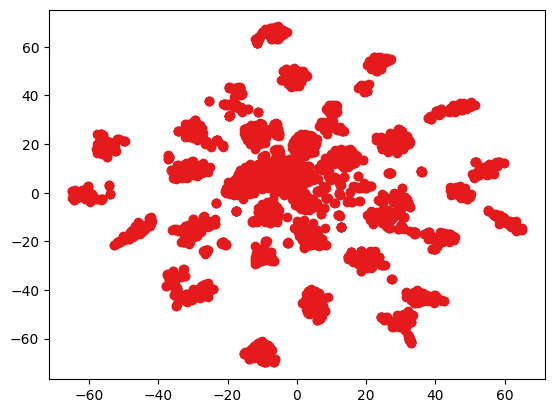

In [28]:
fig,ax = plt.subplots()

ax.scatter(List_tsne_transform.T[0],List_tsne_transform.T[1])

### KMEANS TSNE -> うまくいかない　T2

In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2
import functools

In [ ]:
def anomaly_score(X,x):
    mu = X.mean(axis=0)
    cov2 = np.cov(X.T)
    cov_i = np.linalg.pinv(cov2)
    a = distance.mahalanobis(x, mu, cov_i)**2
    return a

In [ ]:
a_score = np.array(list(map(functools.partial(anomaly_score,X=List_train_tsne_transform),List_train_tsne_transform)))

In [ ]:
m = 2
p = 0.15
threshold = chi2.isf(p, m) 
threshold

### a scoreをもとに判別

In [ ]:
List_tsne_transform_abnormal = List_train_tsne_transform[a_score>threshold]
df_tsne_abnormal = df_train_tsne[a_score>threshold]
List_tsne_abnormal = df_tsne_abnormal.values.tolist()

In [ ]:
fig,ax = plt.subplots()

ax.scatter(List_train_tsne_transform.T[0],List_train_tsne_transform.T[1])
ax.scatter(List_tsne_transform_abnormal.T[0],List_tsne_transform_abnormal.T[1])

#### abnormal 解析

In [ ]:
df_tsne_abnormal_false = df_tsne_abnormal[(df_tsne_abnormal<500).all(axis=1)]
df_tsne_abnormal_false

In [ ]:
fig,ax = plt.subplots()

ax.scatter(List_train_tsne_transform.T[0],List_train_tsne_transform.T[1])
ax.scatter(List_tsne_transform_abnormal[(df_tsne_abnormal<500).all(axis=1)].T[0],List_tsne_transform_abnormal[(df_tsne_abnormal<500).all(axis=1)].T[1])

In [ ]:
fig,ax = plt.subplots()

ax.scatter(List_train_tsne_transform.T[0],List_train_tsne_transform.T[1])
ax.scatter(List_tsne_transform_abnormal[~(df_tsne_abnormal<500).all(axis=1)].T[0],List_tsne_transform_abnormal[~(df_tsne_abnormal<500).all(axis=1)].T[1])

#### normal 解析

In [ ]:
df_tsne_normal = df_train_tsne[a_score<=threshold]
df_tsne_normal =df_tsne_normal[(df_tsne_normal>600).any(axis=1)]
List_tsne_normal = df_tsne_normal.values.tolist()

In [ ]:
myvs.show_multiple_fig_one_graph(x,List_tsne_normal)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(List_train_tsne_transform.T[0],List_train_tsne_transform.T[1])
ax.scatter(List_train_tsne_transform[(df_tsne_normal.index)].T[0],List_train_tsne_transform[(df_tsne_normal.index)].T[1])